# Neural Networks

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
X_train = pd.read_csv('.\data\csv_data\X_TR_561_SENZA_OUTLIERS.csv')
X_test = pd.read_csv('.\data\csv_data\X_test.csv')
y_train = pd.read_csv('.\data\csv_data\Y_TR_561_SENZA_OUTLIERS.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')

In [3]:
# standardizzazione
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## MLPClassifier

In [4]:
from sklearn.neural_network import MLPClassifier

> class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

**PARAMETRI PER MLPClassifier**

In [6]:
mlp = MLPClassifier()

In [7]:
# k folds per cross validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)

# parametri per grid search
param_list = {
    'solver': ['sgd', 'adam'],
    'momentum' : [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'hidden_layer_sizes':[(128, 64, 23,), (100, 69,), (128, 64, 32,)],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [8]:
grid_search = GridSearchCV(mlp, param_grid=param_list, cv=kf)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(128, 64, 23), (100, 69),
                                                (128, 64, 32)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'momentum': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                         'solver': ['sgd', 'adam']})

In [9]:
# Best paramete set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'adaptive', 'momentum': 0, 'solver': 'adam'}
0.947 (+/-0.004) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0, 'solver': 'sgd'}
0.982 (+/-0.003) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0, 'solver': 'adam'}
0.951 (+/-0.010) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'sgd'}
0.982 (+/-0.004) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'adam'}
0.951 (+/-0.008) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0.2, 'solver': 'sgd'}
0.983 (+/-0.006) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0.2, 'solver': 'adam'}
0.958 (+/-0.003) for {'hidden_layer_sizes': (128, 64, 23), 'learning_rate': 'constant', 'momentum': 0.3, 'solver': 'sgd'}
0.983 (+/-0.002) for {'

In [12]:
# model with best parameter settings
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='invscaling', solver='adam', momentum=0.1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.98      0.93      0.95       420
           4       0.96      0.90      0.93       491
           5       0.88      0.97      0.92       532
           6       1.00      0.96      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [11]:
# model with best parameter settings
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 23,), learning_rate='invscaling', solver='adam',momentum=0, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.94      0.95      0.95       471
           3       0.98      0.92      0.95       420
           4       0.95      0.88      0.91       491
           5       0.87      0.96      0.91       532
           6       1.00      0.97      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.94      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [7]:
# model
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='invscaling', solver='adam',momentum=0.3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.98      0.93      0.95       420
           4       0.96      0.90      0.93       491
           5       0.88      0.97      0.92       532
           6       1.00      0.96      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [6]:
# model
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='constant', solver='adam',momentum=0.1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.98      0.93      0.95       420
           4       0.96      0.90      0.93       491
           5       0.88      0.97      0.92       532
           6       1.00      0.96      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [8]:
# model
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='adaptive', solver='sgd',momentum=0.9, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.95      0.95      0.95       471
           3       0.97      0.92      0.95       420
           4       0.96      0.87      0.91       491
           5       0.86      0.96      0.91       532
           6       1.00      0.97      0.98       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [9]:
# model
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='adaptive', solver='sgd',momentum=0.3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96       496
           2       0.92      0.94      0.93       471
           3       0.97      0.89      0.93       420
           4       0.94      0.88      0.91       491
           5       0.88      0.95      0.91       532
           6       1.00      0.98      0.99       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [19]:
# model
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), learning_rate='adaptive', solver='adam',momentum=0.1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.98      0.93      0.95       420
           4       0.96      0.90      0.93       491
           5       0.88      0.97      0.92       532
           6       1.00      0.96      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



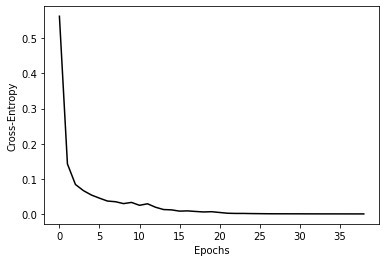

In [24]:
plt.plot(clf.loss_curve_, c='k')#, label=label)
#plt.legend(loc="upper center")
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()

In [17]:
# model
clf = MLPClassifier(hidden_layer_sizes=(100,100,), learning_rate='constant', solver='adam',momentum=0.2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       496
           2       0.94      0.95      0.94       471
           3       0.98      0.91      0.94       420
           4       0.94      0.89      0.91       491
           5       0.87      0.94      0.91       532
           6       1.00      0.96      0.98       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



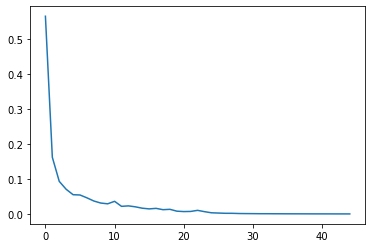

In [18]:
plt.plot(clf.loss_curve_)#, label=label)
#plt.legend(loc="upper center")
plt.show()